In [109]:
import pandas as pd

In [110]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
df.shape

(150, 6)

In [112]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [113]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [114]:
#initial exploratory analysis
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [115]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

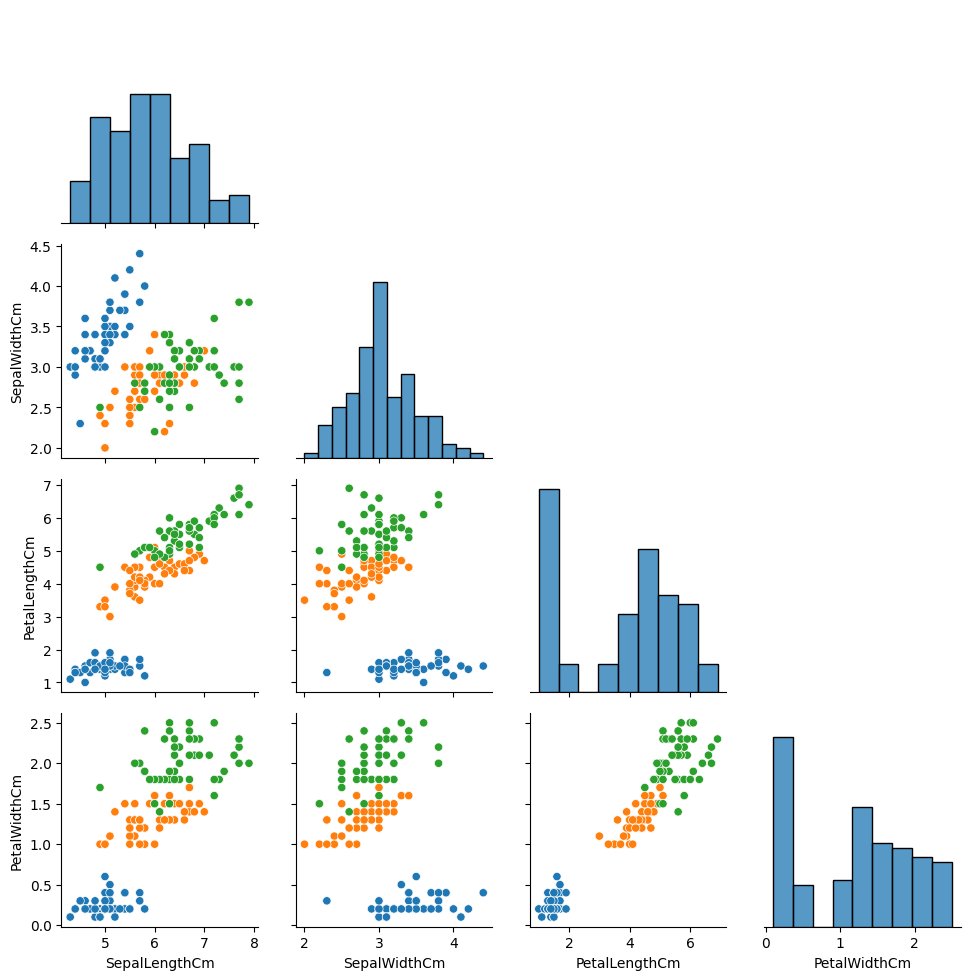

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
g = sns.PairGrid(df[cols], corner=True, hue='Species')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot, hue=None)

<Axes: >

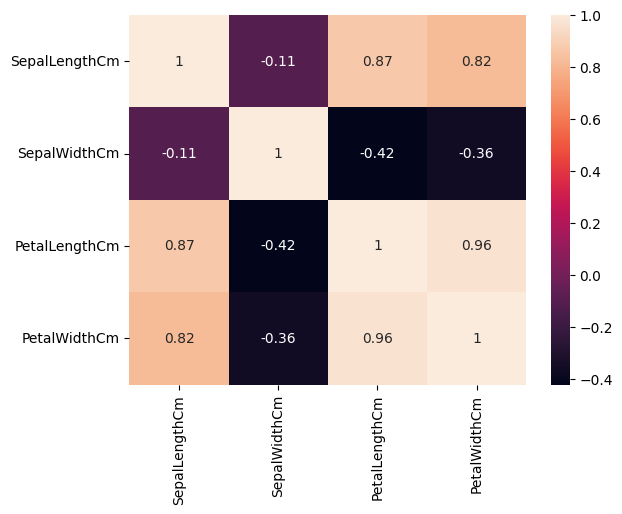

In [118]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

sns.heatmap(df[cols].corr(), annot=True)

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

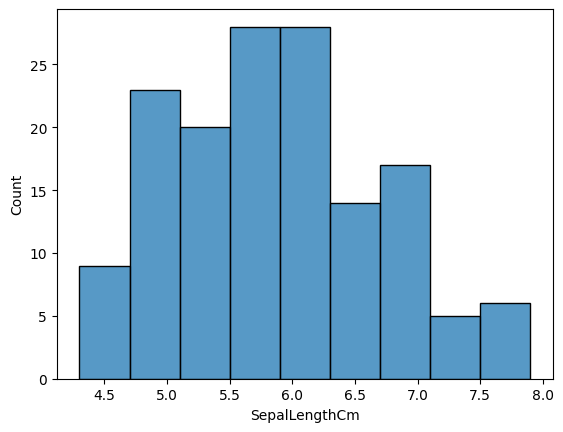

In [119]:
sns.histplot(df['SepalLengthCm'])

In [120]:
from sklearn.model_selection import train_test_split
X=df[cols]
y=df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [121]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(multi_class='ovr', random_state=42)

log_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=42)

In [122]:
from sklearn.model_selection import cross_val_score

def cv(model, x_train, y_train):
    cv_Scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
    return cv_Scores.mean()

In [123]:
y_pred = log_model.predict(X_test)

In [124]:
from sklearn import metrics

def eval_metrics(y_test, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    f1_score = metrics.f1_score(y_test, y_pred, average='macro')
    return acc, precision, recall, f1_score

def print_metrics(y_test, y_pred):
    acc, precision, recall, f1_score = eval_metrics(y_test, y_pred)
    print(f"Accuracy : {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"f1 score : {f1_score}")

In [137]:
y_pred_train = log_model.predict(X_train)

print(f"Train set")
print(f"CV for accuracy: {cv(log_model, X_train, y_train)}")
print_metrics(y_train, y_pred_train)

print(f"\n\nTest set")
print_metrics(y_test, y_pred)

Train set
CV for accuracy: 0.9436363636363637
Accuracy : 0.9619047619047619
Precision: 0.9628719628719629
Recall: 0.9619047619047619
f1 score : 0.9618736383442267


Test set
Accuracy : 0.9111111111111111
Precision: 0.9155354449472096
Recall: 0.9111111111111111
f1 score : 0.9107142857142857


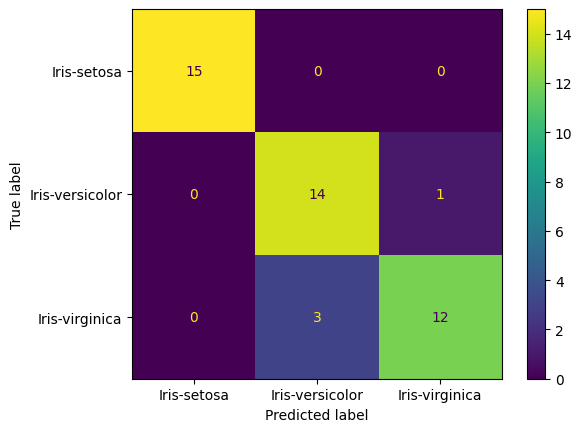

In [138]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=log_model.classes_)
metrics.ConfusionMatrixDisplay(cm, display_labels=log_model.classes_).plot()

In [127]:
LabelEncoder().fit_transform(y_train)

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

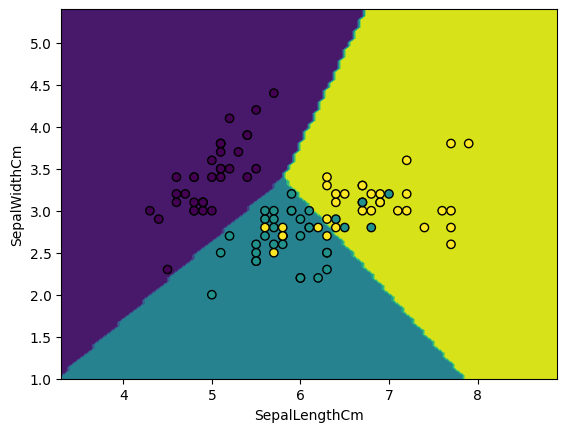

In [128]:
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from sklearn.preprocessing import LabelEncoder
disp = DecisionBoundaryDisplay.from_estimator(
    LogisticRegression().fit(X_train[cols[:2]], y_train), 
    X_train[cols[:2]],
    response_method='predict',

    )
disp.ax_.scatter(X_train[cols[0]], X_train[cols[1]], c=LabelEncoder().fit_transform(y_train), edgecolors="black")

In [129]:
log_model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(random_state=42,)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [131]:
y_pred = rf_model.predict(X_test)

In [132]:
y_pred_train = rf_model.predict(X_train)

print(f"Train set")
print(f"CV for accuracy: {cv(rf_model, X_train, y_train)}")
print_metrics(y_train, y_pred_train)

print(f"\n\nTest set")
print_metrics(y_test, y_pred)

Train set
CV for accuracy: 0.9518181818181819
Accuracy : 1.0
Precision: 1.0
Recall: 1.0
f1 score : 1.0


Test set
Accuracy : 0.8888888888888888
Precision: 0.898148148148148
Recall: 0.8888888888888888
f1 score : 0.8877665544332212


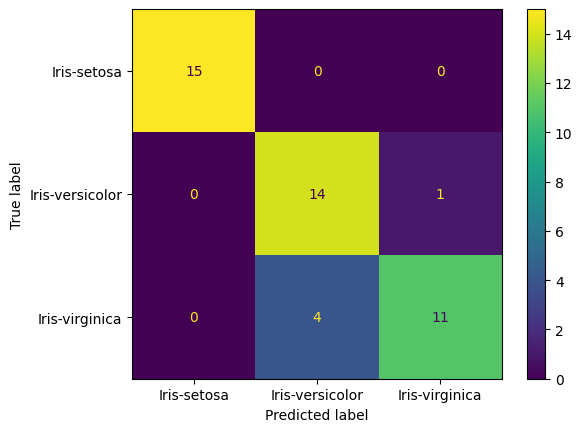

In [133]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=log_model.classes_)
metrics.ConfusionMatrixDisplay(cm, display_labels=log_model.classes_).plot()

In [134]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_leaf' : [1, 3, 5, 8, 10],
    'max_depth': [6, 8 , 10, 20],
}
grid = GridSearchCV(rf_model, params, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print(f"Best params: {grid.best_params_}")


Best params: {'max_depth': 6, 'min_samples_leaf': 5}


In [135]:
y_pred = best_model.predict(X_test)

print(f"\n\nTest set")
print_metrics(y_test, y_pred)



Test set
Accuracy : 0.9111111111111111
Precision: 0.9155354449472096
Recall: 0.9111111111111111
f1 score : 0.9107142857142857


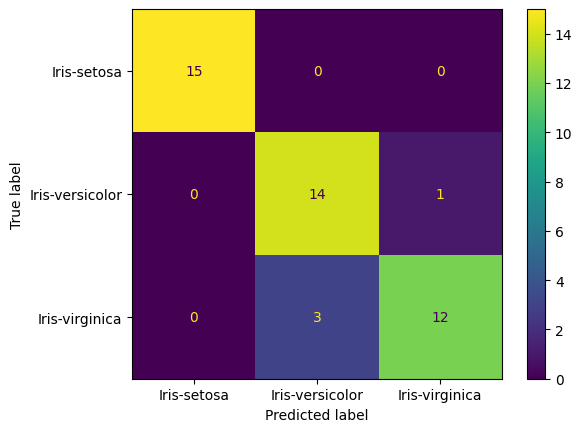

In [136]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=log_model.classes_)
metrics.ConfusionMatrixDisplay(cm, display_labels=log_model.classes_).plot()